<a href="https://colab.research.google.com/github/diegop2110/Talento_Tech_Ciberseguridad/blob/main/Conexi%C3%B3n/Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔷 Recorridos Directos (tabla tipo lista)
  Origen Destino Conexión
0     v1      v2       a1
1     v2      v1       a2
2     v2      v3       a3
3     v3      v4       a4
4     v4      v1       a5
🔷 Matriz de Adyacencia (A)
     v1  v2  v3  v4
v1   0   1   0   0
v2   1   0   1   0
v3   0   0   0   1
v4   1   0   0   0

🔷 Matriz de Recorridos
         v1      v2      v3      v4
v1  193114  151816  119350   93828
v2  245644  193114  151816  119350
v3  119350   93828   73764   57988
v4  151816  119350   93828   73764

🔷 Matriz de Alcance (Reachability)
     v1  v2  v3  v4
v1   1   1   1   1
v2   1   1   1   1
v3   1   1   1   1
v4   1   1   1   1

🔷 Matriz de Distancias Mínimas (Dij)
      v1   v2   v3   v4
v1  0.0  1.0  2.0  3.0
v2  1.0  0.0  1.0  2.0
v3  2.0  3.0  0.0  1.0
v4  1.0  2.0  3.0  0.0


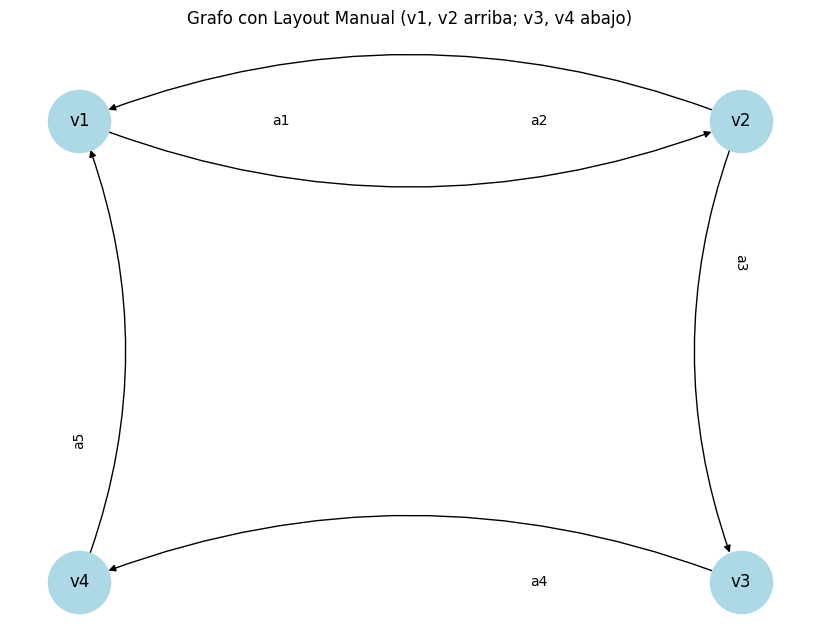

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir nodos y aristas desde la tabla del ejercicio
nodos = ['v1', 'v2', 'v3', 'v4']
aristas = [
    ('v1', 'v2', 'a1'),
    ('v2', 'v1', 'a2'),
    ('v2', 'v3', 'a3'),
    ('v3', 'v4', 'a4'),
    ('v4', 'v1', 'a5')
]

# 2. Construir el grafo dirigido
G = nx.DiGraph()
for origen, destino, etiqueta in aristas:
    G.add_edge(origen, destino, label=etiqueta)

nodes = sorted(G.nodes)
edges = list(G.edges(data=True))

# 3. Matriz de Adyacencia (binaria)
A = nx.to_numpy_array(G, nodelist=nodes, dtype=int)
adjacency_matrix = pd.DataFrame(A, index=nodes, columns=nodes)

# 4. Matriz de Recorridos (suma de caminos de 1 a n pasos)
# Matriz de Recorridos como tabla Origen-Destino-Conexión
recorridos_lista = pd.DataFrame([
    {'Origen': u, 'Destino': v, 'Conexión': d['label']}
    for u, v, d in G.edges(data=True)
])

print("\n Recorridos Directos (tabla tipo lista)")
print(recorridos_lista)


# 5. Matriz de Alcance / Reachability (binaria)
reachability_matrix = (R > 0).astype(int)
reachability_matrix = pd.DataFrame(reachability_matrix, index=nodes, columns=nodes)

# 6. Matriz de Distancias Mínimas (Dij)
lengths = dict(nx.floyd_warshall(G))
distance_matrix = pd.DataFrame(index=nodes, columns=nodes, dtype=float)
for i in nodes:
    for j in nodes:
        distance_matrix.loc[i, j] = lengths[i][j]

# 7. Mostrar matrices
print(" Matriz de Adyacencia (A)\n", adjacency_matrix)
print("\n Matriz de Recorridos\n", recorridos_matrix)
print("\n Matriz de Alcance (Reachability)\n", reachability_matrix)
print("\n Matriz de Distancias Mínimas (Dij)\n", distance_matrix)

# 8. Layout manual para posicionar nodos: v1 y v2 arriba, v3 y v4 abajo
pos = {
    'v1': (-1, 1),
    'v2': (1, 1),
    'v3': (1, -1),
    'v4': (-1, -1),
}
edge_labels = nx.get_edge_attributes(G, 'label')

# 9. Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, node_size=2000,
    node_color='lightblue', font_size=12, arrows=True,
    connectionstyle='arc3,rad=0.2'
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.3)
plt.title("Grafo con Layout Manual (v1, v2 arriba; v3, v4 abajo)")
plt.axis('off')
plt.show()
